### Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1er Ejercicio

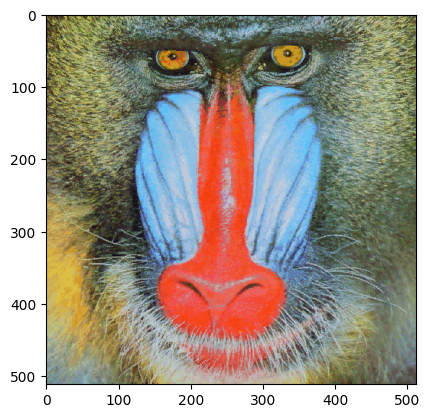

In [2]:
img = cv2.imread('mandril.jpg')
if img is None:
    print('Imagen no encontrada')
    exit()

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

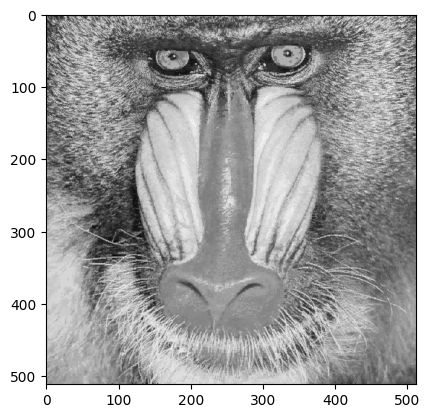

In [3]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grey, cmap='gray')

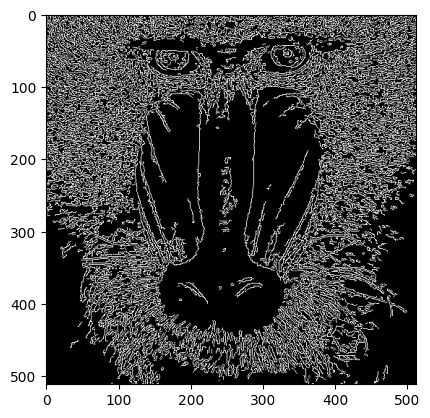

In [4]:
canny = cv2.Canny(grey, 100, 200)
plt.imshow(canny, cmap='gray')

(0.0, 512.0)

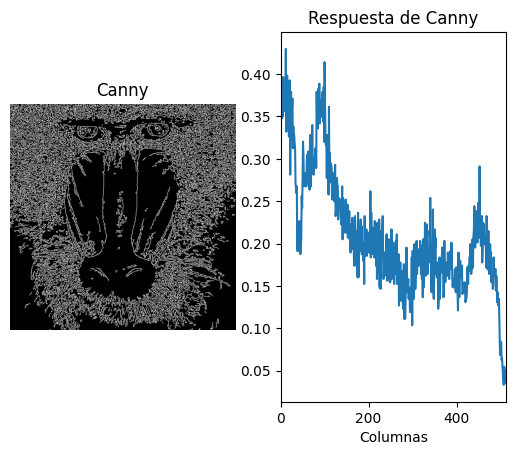

In [5]:
rows_count = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows_count = np.reshape(rows_count, (1,-1))
rows = rows_count[0]/(255*canny.shape[1])

plt.figure()

plt.subplot(1,2,1)
plt.axis('off')
plt.title('Canny')
plt.imshow(canny, cmap='gray')

plt.subplot(1,2,2)
plt.title('Respuesta de Canny')
plt.xlabel('Columnas')
plt.ylabel('% pixeles')

plt.plot(rows)
plt.xlim([0, canny.shape[1]])

In [6]:
max_pixel_val = rows_count.max()
max_pixel_pos = rows_count.argmax()

print(f'Maximo de la suma por filas: {max_pixel_val}, en la posicion: {max_pixel_pos}')

Maximo de la suma por filas: 56100, en la posicion: 12


In [7]:
p95rows = [(idx, elm) for (idx, elm) in enumerate(rows_count[0]) if max_pixel_val*.95 <= elm]
p95rows = [*filter(lambda elm: elm[0] != max_pixel_pos, p95rows)]

print(f'La cantidad de filas por encima del 95% del max es: {len(p95rows)} y son:')
print(p95rows)

La cantidad de filas por encima del 95% del max es: 1 y son:
[(100, np.int32(54060))]


### 2o Ejercicio

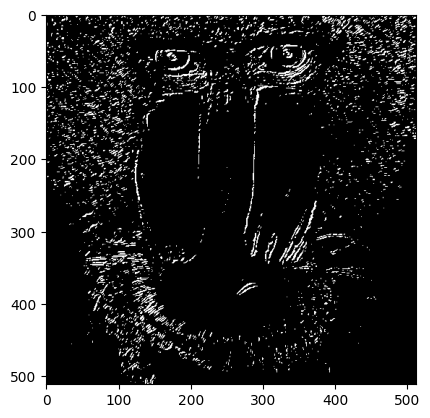

In [39]:
# sobel img
ggrey = cv2.GaussianBlur(grey, (3, 3), 0)

sobelx = cv2.Sobel(ggrey, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(ggrey, cv2.CV_64F, 0, 1)

sobel = cv2.add(sobelx, sobely)

# convert to 8bit
sobel8 = cv2.convertScaleAbs(sobel)

# thresholded
threshold = 170
_, thresholdedImg = cv2.threshold(sobel8, threshold, 255, cv2.THRESH_BINARY)

plt.imshow(thresholdedImg, cmap='gray')

In [49]:
# rows & columns count
cols_count = cv2.reduce(thresholdedImg, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows_count = cv2.reduce(thresholdedImg, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows_count = np.reshape(rows_count, (1,-1))

# max value rows & columns
rows_max_val = rows_count.max()
rows_max_pos = rows_count.argmax()

cols_max_val = cols_count.max()
cols_max_pos = cols_count.argmax()

print(f'# Filas\n\tValor: {rows_max_val}\n\tPosición: {rows_max_pos}\t')
print()
print(f'# Columnas\n\tValor: {cols_max_val}\n\tPosición: {cols_max_pos}')

# Filas
	Valor: 27030
	Posición: 82	

# Columnas
	Valor: 23970
	Posición: 288


In [50]:
p95rows = [(idx, val) for (idx, val) in enumerate(rows_count[0]) if val >= rows_max_val*.95]
p95rows = [*filter(lambda elm: elm[0] != rows_max_pos, p95rows)]

p95cols = [(idx, val) for (idx, val) in enumerate(cols_count[0]) if val >= cols_max_val*.95]
p95cols = [*filter(lambda elm: elm[0] != cols_max_pos, p95cols)]

print(f'# Filas\n\tLa cantidad de filas por encima del 95% del max es: {len(p95rows)} y los elementos son:\n\t{p95rows}')
print()
print(f'# Columnas\n\tLa cantidad de columnas por encima del 95% del max es: {len(p95cols)} y los elementos son:\n\t{p95cols}')

# Filas
	La cantidad de filas por encima del 95% del max es: 0 y los elementos son:
	[]

# Columnas
	La cantidad de columas por encima del 95% del max es: 1 y los elementos son:
	[(104, np.int32(23205))]


In [ ]:
# Remarcar con alguna primitiva las gráficas
